In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [6]:
df=pd.read_csv("/content/country_vaccinations.csv")


In [ ]:
df.head()


In [ ]:
df.isnull().sum()


In [9]:
df.fillna(0, inplace = True)
df.drop(df.index[df['iso_code'] == 0], inplace = True)

In [ ]:
df.isnull().sum()


In [ ]:
df.info()


In [12]:
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')


In [13]:
df.columns


Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [14]:
df.drop(["people_fully_vaccinated","daily_vaccinations_raw","people_fully_vaccinated_per_hundred",
         "daily_vaccinations_per_million","people_vaccinated_per_hundred", "source_name","source_website"],axis=1, inplace=True)


In [ ]:
df_USA = df[df["iso_code"] == 'USA'].copy()
df_USA


In [23]:
sns.set(font_scale=1.5, style="whitegrid")


In [24]:
df_USA.drop(df_USA.index[df_USA['total_vaccinations'] == 0], inplace = True)


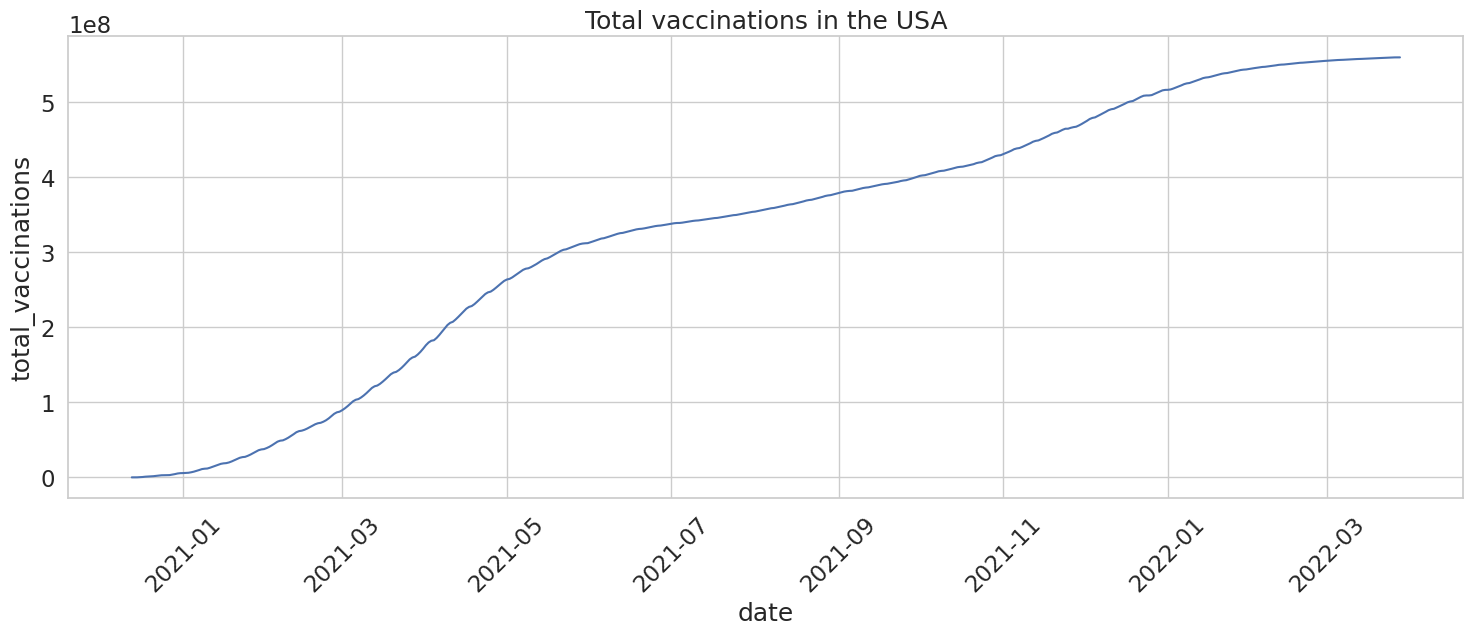

In [25]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA, x="date", y="total_vaccinations")
plt.title("Total vaccinations in the USA")
plt.xticks(rotation=45)
plt.show()



Text(0.5, 1.0, 'Daily vaccinations in the USA')

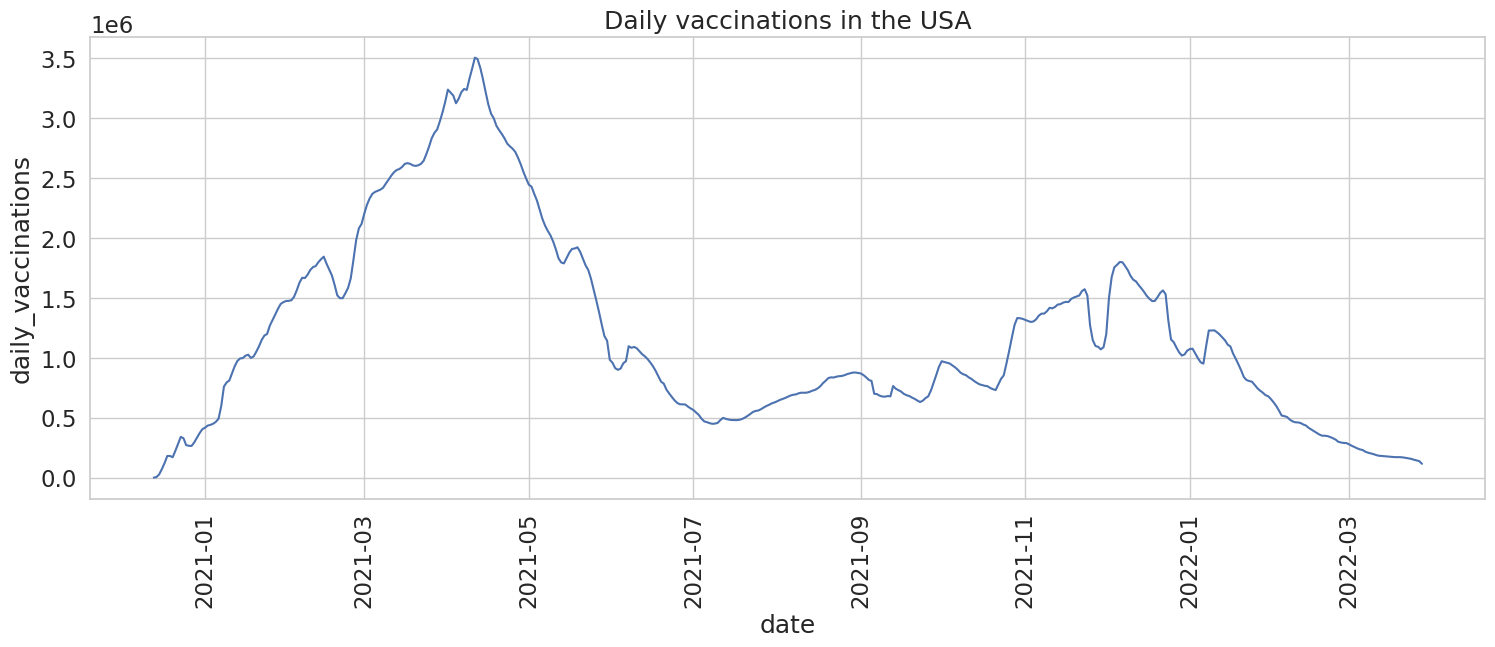

In [26]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_USA, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in the USA")

In [ ]:
df_India = df[df["iso_code"] == 'IND'].copy()
df_India

In [28]:
df_India.drop(df_India.index[df_India['total_vaccinations'] == 0], inplace = True)

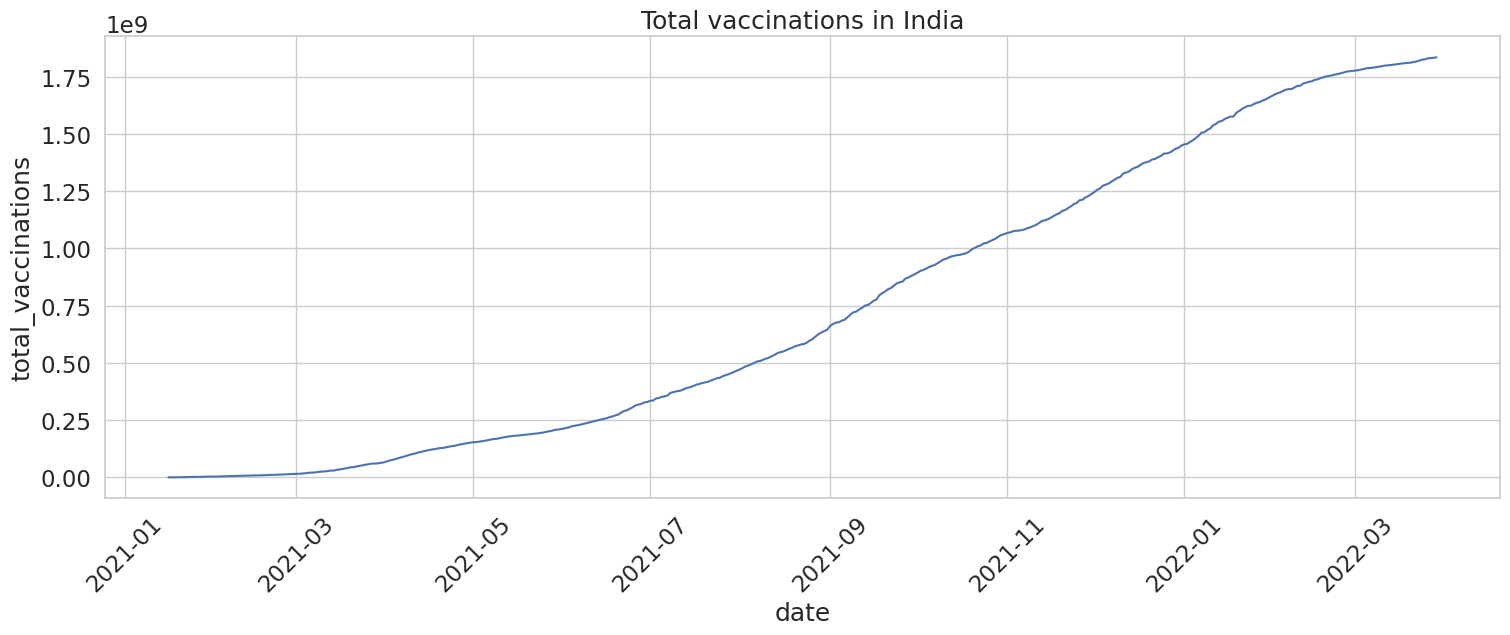

In [29]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_India, x="date", y="total_vaccinations")
plt.title("Total vaccinations in India")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations in India')

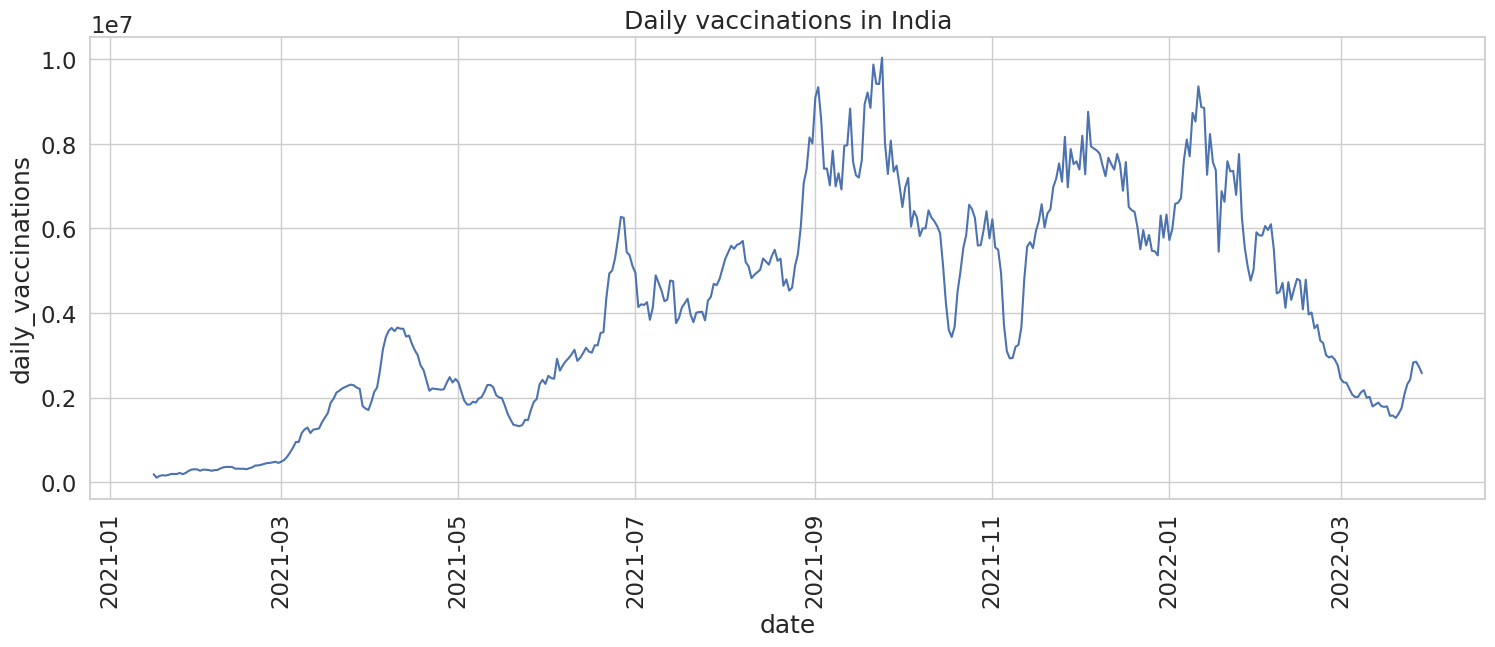

In [30]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_India, x="date", y="daily_vaccinations")

plt.xticks(rotation=90)
plt.title("Daily vaccinations in India")


In [31]:
vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
vacc_by_country = vacc_by_country.iloc[:10]
vacc_by_country


,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-03-29,3.263129e+09,1.275541e+09,22424286.0,225.94,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2022-03-29,1.834501e+09,9.848381e+08,10037995.0,131.66,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2022-03-28,5.601818e+08,2.553624e+08,3506960.0,168.72,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1941268.0,193.26,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1897011.0,136.45,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr..."
Japan,JPN,2022-03-29,2.543456e+08,1.024675e+08,1997542.0,201.78,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Bangladesh,BGD,2022-03-29,2.436427e+08,1.275441e+08,3758404.0,146.50,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Pakistan,PAK,2022-03-10,2.193686e+08,1.280741e+08,2175773.0,97.41,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Vietnam,VNM,2022-03-22,2.031444e+08,7.994719e+07,1675471.0,206.93,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."


In [32]:
vacc_by_country = vacc_by_country.sort_values('total_vaccinations_per_hundred', ascending=False)
vacc_by_country

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2022-03-29,3.263129e+09,1.275541e+09,22424286.0,225.94,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
Vietnam,VNM,2022-03-22,2.031444e+08,7.994719e+07,1675471.0,206.93,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Japan,JPN,2022-03-29,2.543456e+08,1.024675e+08,1997542.0,201.78,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1941268.0,193.26,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
United States,USA,2022-03-28,5.601818e+08,2.553624e+08,3506960.0,168.72,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Mexico,MEX,2022-03-29,1.919079e+08,8.558029e+07,1648223.0,147.32,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
Bangladesh,BGD,2022-03-29,2.436427e+08,1.275441e+08,3758404.0,146.50,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1897011.0,136.45,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr..."
India,IND,2022-03-29,1.834501e+09,9.848381e+08,10037995.0,131.66,"Covaxin, Oxford/AstraZeneca, Sputnik V"


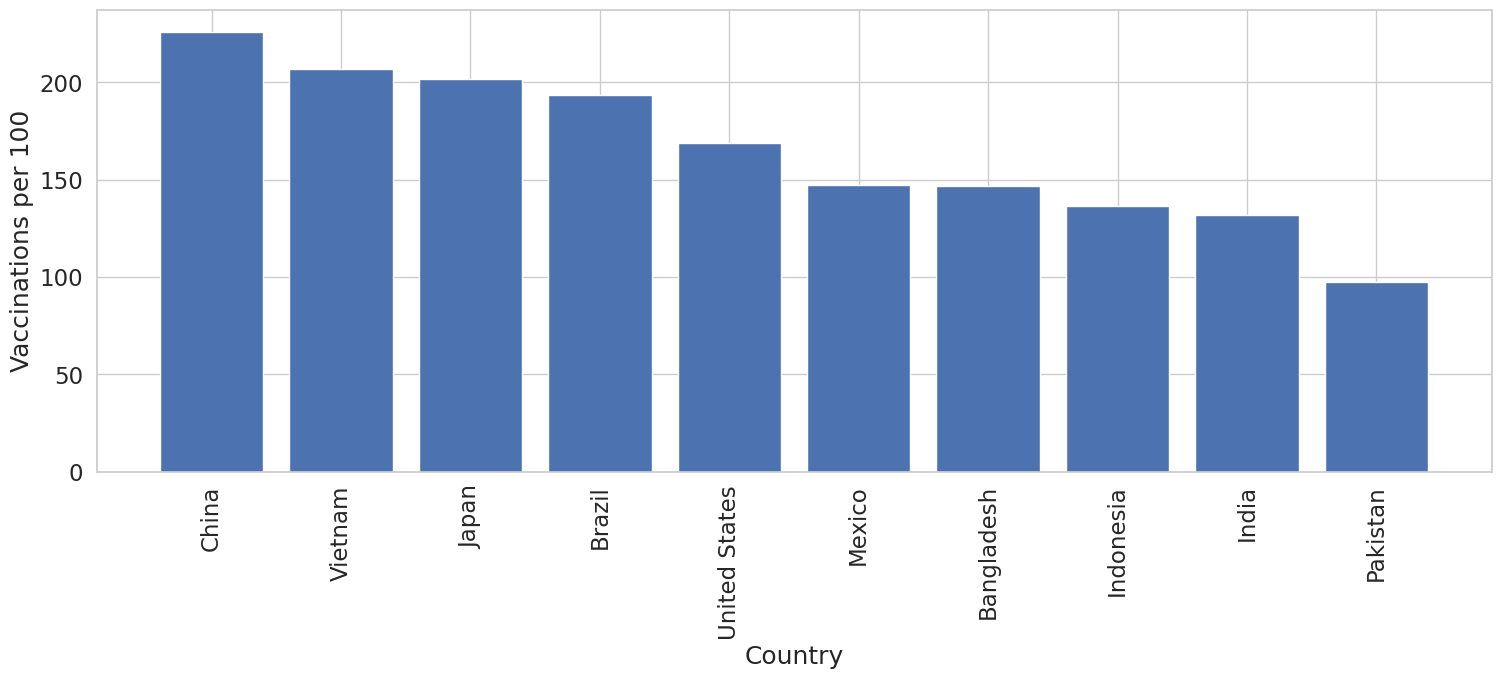

In [33]:
plt.figure(figsize=(18, 6))
plt.bar(vacc_by_country.index, vacc_by_country.total_vaccinations_per_hundred)

plt.xticks(rotation = 90)
plt.ylabel('Vaccinations per 100')
plt.xlabel('Country')
plt.show()

In [ ]:
total_vacc_by_country = df.groupby('country').max().sort_values('total_vaccinations', ascending=False)
total_vacc_by_country = total_vacc_by_country.iloc[:10]
total_vacc_by_country



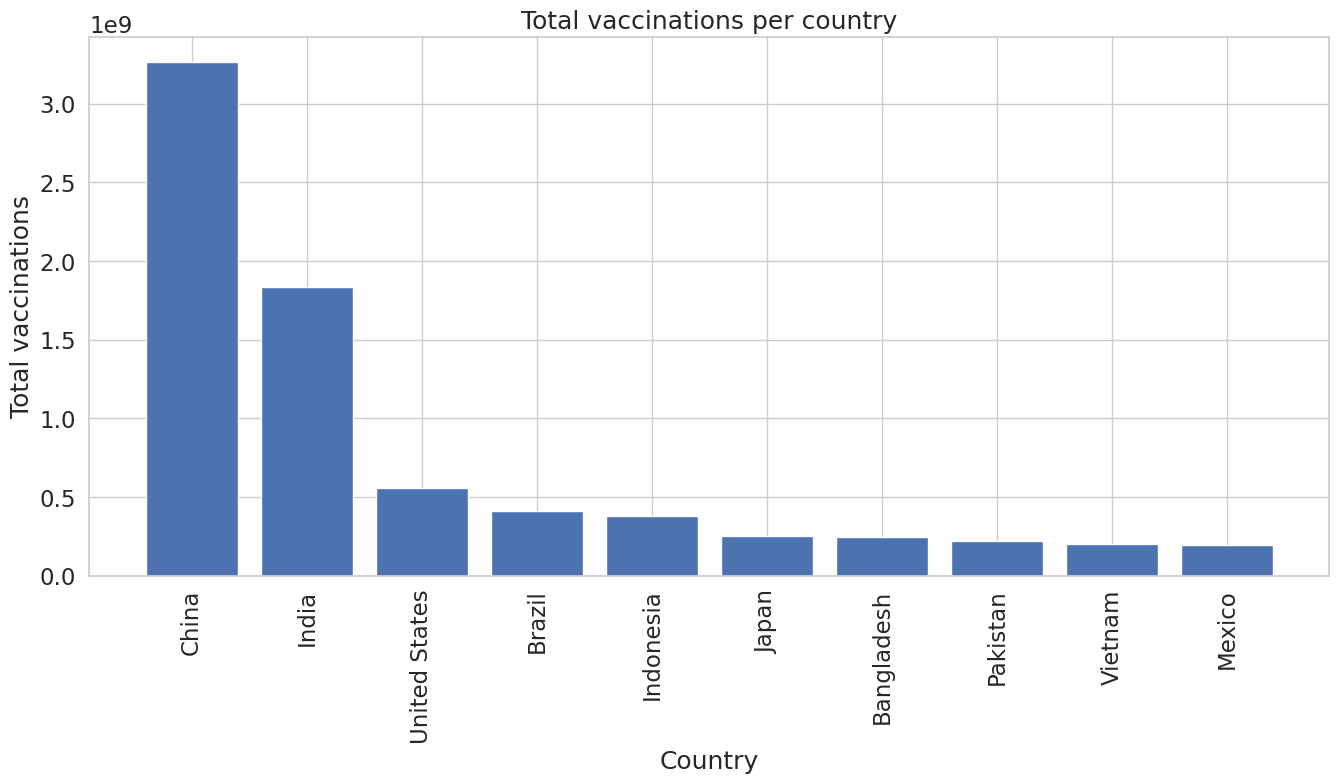

In [35]:
plt.figure(figsize=(16, 7))
plt.bar(total_vacc_by_country.index, total_vacc_by_country.total_vaccinations)

plt.title('Total vaccinations per country')
plt.xticks(rotation = 90)
plt.ylabel('Total vaccinations')
plt.xlabel('Country')
plt.show()

In [36]:
vacc_names_by_country = df.groupby('vaccines').max().sort_values('total_vaccinations', ascending=False)
vacc_names_by_country.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
vaccines,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2022-03-29,3.263129e+09,1.275541e+09,22424286.0,225.94
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-03-29,1.834501e+09,9.848381e+08,10037995.0,131.66
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-03-28,5.601818e+08,2.553624e+08,3506960.0,227.27
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1941268.0,193.26
"Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1897011.0,136.45


In [37]:
vacc_names_by_country = vacc_names_by_country.iloc[:10]
vacc_names_by_country

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
vaccines,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2022-03-29,3.263129e+09,1.275541e+09,22424286.0,225.94
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-03-29,1.834501e+09,9.848381e+08,10037995.0,131.66
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-03-28,5.601818e+08,2.553624e+08,3506960.0,227.27
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1941268.0,193.26
"Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1897011.0,136.45
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2022-03-29,2.543456e+08,1.024675e+08,1997542.0,237.79
"Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Bangladesh,BGD,2022-03-29,2.436427e+08,1.275441e+08,3758404.0,146.50
"CanSino, Covaxin, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik V",Pakistan,PAK,2022-03-10,2.193686e+08,1.280741e+08,2175773.0,97.41
"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",Vietnam,VNM,2022-03-22,2.031444e+08,7.994719e+07,1675471.0,206.93


In [38]:
vacc_names_by_country=vacc_names_by_country.reset_index()
vacc_names_by_country

,vaccines,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,CHN,2022-03-29,3.263129e+09,1.275541e+09,22424286.0,225.94
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2022-03-29,1.834501e+09,9.848381e+08,10037995.0,131.66
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2022-03-28,5.601818e+08,2.553624e+08,3506960.0,227.27
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,BRA,2022-03-29,4.135596e+08,1.810781e+08,1941268.0,193.26
4,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Indonesia,IDN,2022-03-29,3.771089e+08,1.962409e+08,1897011.0,136.45
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2022-03-29,2.543456e+08,1.024675e+08,1997542.0,237.79
6,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Bangladesh,BGD,2022-03-29,2.436427e+08,1.275441e+08,3758404.0,146.50
7,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...",Pakistan,PAK,2022-03-10,2.193686e+08,1.280741e+08,2175773.0,97.41
8,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",Vietnam,VNM,2022-03-22,2.031444e+08,7.994719e+07,1675471.0,206.93
9,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,MEX,2022-03-29,1.919079e+08,8.558029e+07,1648223.0,147.32


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001'),
  Text(1, 0, 'Covaxin, Oxford/AstraZeneca, Sputnik V'),
  Text(2, 0, 'Johnson&Johnson, Moderna, Pfizer/BioNTech'),
  Text(3, 0, 'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac'),
  Text(4, 0, 'Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac'),
  Text(5, 0, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(6, 0, 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac'),
  Text(7, 0, 'CanSino, Covaxin, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik V'),
  Text(8, 0, 'Abdala, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'),
  Text(9, 0, 'CanSino, Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V')])

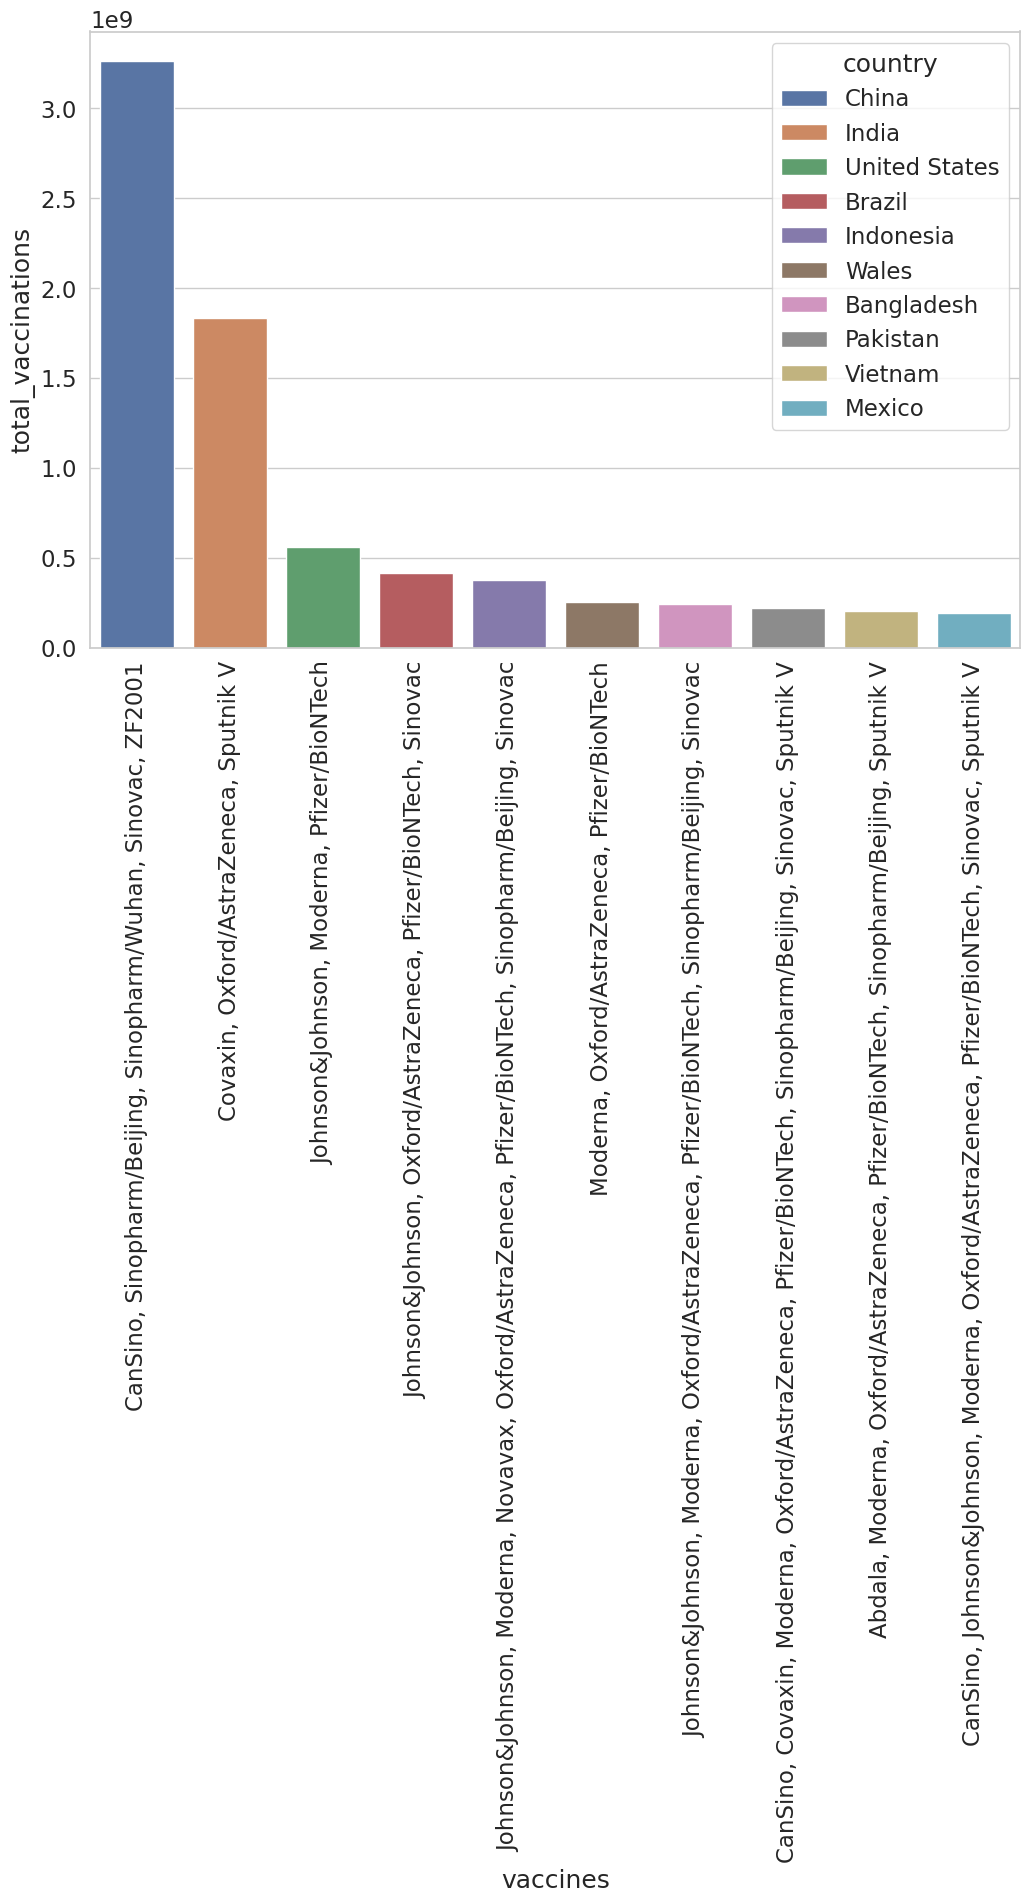

In [39]:
plt.figure(figsize=(12,8))

sns.barplot(data = vacc_names_by_country, x='vaccines', y = 'total_vaccinations', hue = 'country', dodge=False)
plt.xticks(rotation=90)

In [40]:
fig = px.choropleth(df.reset_index(), locations="iso_code",
                    color="total_vaccinations_per_hundred",
                    color_continuous_scale=px.colors.sequential.Electric,
                   title= "Total vaccinations per 100")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})  #No margin on left, right, top and bottom
fig.show()